In [1]:
import catboost
import pandas as pd

In [2]:
performances = pd.read_csv("data_for_task.csv", index_col=0).dropna(axis=0)
performances

,id,average_ensemble,average_mlp,ensemble_mlp_diffn,AutoCorrelation,CfsSubsetEval_DecisionStumpAUC,CfsSubsetEval_DecisionStumpErrRate,CfsSubsetEval_DecisionStumpKappa,CfsSubsetEval_NaiveBayesAUC,CfsSubsetEval_NaiveBayesErrRate,...,RandomTreeDepth2AUC,RandomTreeDepth2ErrRate,RandomTreeDepth2Kappa,RandomTreeDepth3AUC,RandomTreeDepth3ErrRate,RandomTreeDepth3Kappa,StdvNominalAttDistinctValues,kNN1NAUC,kNN1NErrRate,kNN1NKappa
0,1,0.958916,0.928211,0.030705,0.606466,0.981204,0.023385,0.941800,0.981204,0.023385,...,0.967172,0.022272,0.943873,0.967172,0.022272,0.943873,1.502523,0.948265,0.030067,0.922629
1,2,0.907264,0.967613,-0.060349,0.606466,0.906774,0.132517,0.619102,0.906774,0.132517,...,0.929700,0.080178,0.795325,0.929700,0.080178,0.795325,1.557606,0.872195,0.063474,0.826110
2,3,0.978562,0.954068,0.024494,0.999061,0.961912,0.059136,0.881192,0.961912,0.059136,...,0.945136,0.054443,0.890850,0.945136,0.054443,0.890850,0.164399,0.972843,0.069149,0.860968
3,3,0.978562,0.954068,0.024494,0.999061,0.961912,0.059136,0.881192,0.961912,0.059136,...,0.945136,0.054443,0.890850,0.945136,0.054443,0.890850,0.164399,0.972843,0.069149,0.860968
4,3,0.978562,0.954068,0.024494,0.999061,0.961912,0.059136,0.881192,0.961912,0.059136,...,0.945136,0.054443,0.890850,0.945136,0.054443,0.890850,0.164399,0.972843,0.069149,0.860968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,10074,0.962136,0.831715,0.130421,0.987694,0.957609,0.026537,0.905922,0.957609,0.026537,...,0.902866,0.056958,0.798384,0.902866,0.056958,0.798384,0.000000,0.952412,0.023948,0.913788
3296,10075,0.968608,0.918447,0.050162,0.987694,0.909885,0.025243,0.825828,0.909885,0.025243,...,0.686802,0.097087,0.365670,0.686802,0.097087,0.365670,0.000000,0.850311,0.042071,0.707527
3297,10076,0.947977,0.950162,-0.002184,0.987694,0.618161,0.056958,0.332928,0.618161,0.056958,...,0.515800,0.089968,0.032195,0.515800,0.089968,0.032195,0.000000,0.661059,0.082201,0.271099
3298,10077,0.917476,0.871845,0.045631,0.987694,0.752021,0.094498,0.569704,0.752021,0.094498,...,0.662674,0.144984,0.333980,0.662674,0.144984,0.333980,0.000000,0.661504,0.113269,0.382769


In [3]:
X = performances.drop(["average_ensemble", "average_mlp", "ensemble_mlp_diffn", "id"], axis=1)
y = performances["ensemble_mlp_diffn"]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:

X_train

,AutoCorrelation,CfsSubsetEval_DecisionStumpAUC,CfsSubsetEval_DecisionStumpErrRate,CfsSubsetEval_DecisionStumpKappa,CfsSubsetEval_NaiveBayesAUC,CfsSubsetEval_NaiveBayesErrRate,CfsSubsetEval_NaiveBayesKappa,CfsSubsetEval_kNN1NAUC,CfsSubsetEval_kNN1NErrRate,CfsSubsetEval_kNN1NKappa,...,RandomTreeDepth2AUC,RandomTreeDepth2ErrRate,RandomTreeDepth2Kappa,RandomTreeDepth3AUC,RandomTreeDepth3ErrRate,RandomTreeDepth3Kappa,StdvNominalAttDistinctValues,kNN1NAUC,kNN1NErrRate,kNN1NKappa
2994,0.150943,0.936596,0.140580,0.837037,0.936596,0.140580,0.837037,0.936596,0.140580,0.837037,...,0.680085,0.550725,0.359090,0.680085,0.550725,0.359090,0.000000,0.635559,0.608696,0.273950
3254,0.172230,0.502010,0.778667,0.007788,0.502010,0.778667,0.007788,0.502010,0.778667,0.007788,...,0.499462,0.856000,-0.001221,0.499462,0.856000,-0.001221,2.872281,0.502117,0.849333,0.002347
3256,0.272975,0.597146,0.691818,0.097202,0.597146,0.691818,0.097202,0.597146,0.691818,0.097202,...,0.565464,0.684545,0.132050,0.565464,0.684545,0.132050,1.224745,0.557488,0.696364,0.115886
439,0.713073,0.948746,0.056481,0.866635,0.948746,0.056481,0.866635,0.948746,0.056481,0.866635,...,0.920075,0.069540,0.842043,0.920075,0.069540,0.842043,0.000000,0.860730,0.123705,0.720661
2668,0.901042,0.980657,0.020725,0.955174,0.980657,0.020725,0.955174,0.980657,0.020725,0.955174,...,0.940393,0.051813,0.886484,0.940393,0.051813,0.886484,0.000000,0.993922,0.005181,0.988757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,0.528529,0.837483,0.184000,0.631971,0.837483,0.184000,0.631971,0.837483,0.184000,0.631971,...,0.659744,0.340000,0.319565,0.659744,0.340000,0.319565,0.000000,0.634914,0.365000,0.269796
1136,0.511013,0.984985,0.013158,0.973684,0.984985,0.013158,0.973684,0.984985,0.013158,0.973684,...,0.958420,0.052632,0.894615,0.958420,0.052632,0.894615,0.000000,0.987179,0.013158,0.973684
1300,0.926357,0.716137,0.158301,0.507308,0.716137,0.158301,0.507308,0.716137,0.158301,0.507308,...,0.636032,0.305019,0.243110,0.636032,0.305019,0.243110,0.000000,0.831222,0.193050,0.558954
866,0.886502,0.928864,0.025186,0.775972,0.928864,0.025186,0.775972,0.928864,0.025186,0.775972,...,0.785261,0.036585,0.652262,0.785261,0.036585,0.652262,0.668312,0.789559,0.041092,0.615379


In [6]:
model = catboost.CatBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

Learning rate set to 0.047707
0:	learn: 0.1035967	total: 60.2ms	remaining: 1m
1:	learn: 0.1017599	total: 67.5ms	remaining: 33.7s
2:	learn: 0.1000900	total: 75.2ms	remaining: 25s
3:	learn: 0.0984258	total: 82ms	remaining: 20.4s
4:	learn: 0.0967056	total: 88.9ms	remaining: 17.7s
5:	learn: 0.0952772	total: 95.1ms	remaining: 15.8s
6:	learn: 0.0938770	total: 102ms	remaining: 14.4s
7:	learn: 0.0925513	total: 108ms	remaining: 13.4s
8:	learn: 0.0912762	total: 114ms	remaining: 12.5s
9:	learn: 0.0900725	total: 122ms	remaining: 12.1s
10:	learn: 0.0890693	total: 131ms	remaining: 11.8s
11:	learn: 0.0879929	total: 137ms	remaining: 11.3s
12:	learn: 0.0869141	total: 143ms	remaining: 10.9s
13:	learn: 0.0859780	total: 150ms	remaining: 10.5s
14:	learn: 0.0850816	total: 156ms	remaining: 10.3s
15:	learn: 0.0841852	total: 162ms	remaining: 9.95s
16:	learn: 0.0834095	total: 169ms	remaining: 9.76s
17:	learn: 0.0825288	total: 175ms	remaining: 9.53s
18:	learn: 0.0816614	total: 182ms	remaining: 9.42s
19:	learn: 0

0.6693652427723253

<AxesSubplot:xlabel='feature'>

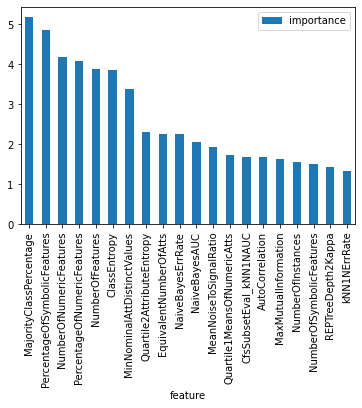

In [7]:
pd.DataFrame(zip(X_train.columns,model.feature_importances_), columns=["feature", "importance"]).sort_values("importance", ascending=False).iloc[:20].plot.bar(x="feature", y="importance")

In [8]:

import tensorflow as tf
from tensorflow import keras

normalizer = keras.layers.Normalization(axis=-1, name='normalizer')
normalizer.adapt(X_train)

2022-03-18 11:48:51.220477: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    normalizer,
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam", )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalizer (Normalization)  (None, 107)               215       
                                                                 
 dense (Dense)               (None, 128)               13824     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [10]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
17/17 [==============================] - 1s 11ms/step - loss: 0.1500 - val_loss: 0.0966
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0976 - val_loss: 0.0283
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0569 - val_loss: 0.0152
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0358 - val_loss: 0.0127
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.0086
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.0080
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.0073
Epoch 8/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0127 - val_loss: 0.0062
Epoch 9/50
17/17 [==============================] - 0s 5ms/step - loss: 0.0285 - val_loss: 0.0066
Epoch 10/50
17/17 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0083
Epoch 11/50
17/17 

In [11]:
import keras_tuner as kt
import tensorflow_addons as tfa


def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(normalizer)
    for n_layer in range(hp.Int('n_layers', 1, 6, default=2)):
        model.add(keras.layers.Dense(hp.Int('n_units_'+str(n_layer), 1, 512), activation=hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_'+str(n_layer), 0, 0.5, step=0.05)))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=[tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,))])
    return model

tuner = kt.Hyperband(build_model,
                        objective=kt.Objective("r_square", "max"),
                        max_epochs=100,
                        directory='/tmp/keras_tuner',
                        project_name='lastduel',
                        overwrite=True)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2) 

Trial 7 Complete [00h 00m 01s]
val_loss: 0.02480907179415226

Best val_loss So Far: 0.010340719483792782
Total elapsed time: 00h 00m 08s

Search: Running Trial #8

Hyperparameter    |Value             |Best Value So Far 
n_layers          |5                 |4                 
n_units_0         |136               |71                
activation        |sigmoid           |sigmoid           
dropout_0         |0.3               |0.45              
n_units_1         |144               |289               
dropout_1         |0.5               |0.15              
n_units_2         |268               |304               
dropout_2         |0.35              |0.25              
n_units_3         |236               |466               
dropout_3         |0.15              |0.05              
n_units_4         |92                |None              
dropout_4         |0.4               |None              
n_units_5         |339               |None              
dropout_5         |0.3               |

KeyboardInterrupt: 

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, best_model.predict(X_test)), r2_score(y_test, best_model.predict(X_test))

(0.003156593170047117, 0.6843623738315274)